<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_0722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*   기계학습은 학습에 의해 모델을 구축한 후, Test dataset을 사용하여 N-fold class-validation으로 precision, recall, f1 및 MAPE, RMSE 등 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 실측하여 알 수 없다.
*   Time-series data에 의한 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 별도의 labeling 작업을 해야 한다.
*   즉, 한번 구축한 모델은 활용 단계에서 성능을 실측하는 것이 매우 어려우며, 비즈니스상에서 IT운영팀에서 이를 관리하는 것은 현실적으로 불가능 하다.
*   하지만, 비즈니스 상에서 모델의 활용 중에 성능이 저하된다면 의사결정 및 경영상의 문제를 초래 할 수 있다.
*   하여, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔다.
*   하지만, concept drift의 측정값 (통계량)을 통해 precision, recall, accuracy 등 직접적으로 성능을 예측하는 연구는 많지 않다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision, recall, accuracy 등 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다.












# Proposed Method

1.   Feature의 importanc를 측정하는 Lime 알고리즘은 reference data를 기반으로 가상의 dataset을 임의 생성(permutation)하여 model.predict에 의한 결과 (Y)를 대조 분석하여 importance를 추정(실험의 시행에 따른 statistics에 해당) 한다.
2.   즉, dataset의 feature중 x1의 값이 변하여도 Y의 변동이 없다면 x1의 importance는 낮은 것이다. 
3.   실험 dataset에서 X1의 변동량 대비 Y의 변동량을 통계적으로 측정하여 importance를 추정하는 것이다.
4.  유사한 원리로 data drift  model performance (accuracy) 모델을 생성할 수 있을 것이다.
5.   즉, 전체 Trainset에서 N-fold class-validation의 개념으로 reference dataset과 inference dataset을 임의로 나누고, 
6. inference dataset에 permutation에 의해 x의 값을 변형하여 drift를 유도하고,
7. reference 의 feature x1 대비 inference의 feature x1의 drift statistics 을 측정하고 (이때, x2,x3… 모든 feature의 drift statistics 이 측정될 것임) 이때의 inference dataset의 accuracy를 측정하여 y값으로 설정하고
8.   각 feature의 drift statistics 를 x로 설정하여 regressio에 의해 modeling (학습) 한다.
9.   물론, trainset 내의 분포, 범위라는 한계성을 갖지만,  직접적인 model 성능 추정이 가능할 것이다.









## reference data에 대응하는 inference data를 sampling(복원추출)하고, permutation에 의해 drift 주입, feature의 drift statistics 로부터 직접 model의 성능을 추정한다.

### sudo code

In [ ]:
trainset : y=f(x)
base_score = Score of base model
sampling_range = 0.05~0.95
sigma_multiplier = 1
for n sampling_count:
    y_ref, y_inf, x_ref, x_inf = split(y, x, sampling_range)
    x_inf = permutation(x_inf,sigma_multiplier)
    inf_score = score(y_inf, predict(x_inf))
    if base_score > inf_score:
        x_drift_statistics,x_drift_p_value = drift(x, x_inf)
        scores.add(inf_score)
        feature_drift.add(x_drift_statistics * (1 if x_drift_p_value < 0.05 else 0))
        
perfomance_predict_model = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift_statistics,x_live_drift_p_value = drift(x, x_live)
predict_score = perfomance_predict_model(x_live_drift_statistics * (1 if x_live_drift_p_value < 0.05 else 0))

# 실험 계획

*   Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>

* 예측 알고리즘
> Random-forest 알고리즘<BR>
> Deep-learning 알고리즘

* 실험
> 2010년 data를 기준으로 모델 학습<BR>
>2011년~2017년의 데이터를 2010년 학습데이터의 건수 (8000건) 단위로 drift 측정
모델의 예측 성능과 실 성능을 비교<BR>

* 실험의 변수
> feature_count (order of importance) = 5, 8, 10<br>
> sampling_range = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> sigma_multiplier = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 데이터 준비

In [3]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

np.random.seed(1337)

In [276]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [277]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [278]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [279]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [280]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [281]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [282]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [283]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [284]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [285]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [286]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [287]:
df_accepted.shape

(1341026, 86)

In [288]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [289]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [290]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [291]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [292]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [293]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [294]:
X = {}
Y = {}

In [295]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [296]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [297]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [298]:
X[2010].shape

(11497, 81)

In [299]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [300]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

# 예측 모델 준비

In [301]:
ML = {}
scaler = MinMaxScaler()

In [302]:
MODEL_TYPE = 'RF'  ## RF / DL

## random forest 모델

In [303]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [304]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

# loan predict model build

In [305]:
offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

# model performance predict class

In [314]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm # import statsmodels 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import random
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

class MPP:
    def __init__(self,predict,column_names,importances ,y_ref,x_ref,y_inf,x_inf,scaler=None):
        self.predict = predict
        self.scaler = scaler
        self.y_ref = y_ref
        self.x_ref = x_ref
        self.y_inf = y_inf
        self.x_inf = x_inf
        self.COLUMNS = column_names
        importances = importances/sum(importances)

        self.l = []
        for x,(c,i) in enumerate(zip(column_names,importances)):
            self.l.append((c,i,x))
        self.l.sort(key = lambda x: x[1],reverse=True) 

        self.df_stat = pd.DataFrame({"mean":np.mean(x_ref,axis=0),"std":np.std(x_ref,axis=0)},index=column_names)

    def split_sample(self,yy,xx,train_size = 0.7, middle_offset = False):
        size = xx.shape[0]
        offset = int(size*train_size)
        mo = 0
        if middle_offset:
            mo = int(random.random() * (size - offset))
            #print(mo)

        x_ref1 = xx[mo:mo+offset]
        y_ref1 = yy[mo:mo+offset]
        x_inf1 = np.concatenate([xx[0:mo], xx[mo+offset:]], axis=0)
        y_inf1 = np.concatenate([yy[0:mo],yy[mo+offset:]], axis=0)

        return y_ref1,x_ref1,y_inf1,x_inf1 

    def __ks_2samp2(self,sample1, sample2):
        # Gets all observations
        sample1 = np.sort(sample1)
        sample2 = np.sort(sample2)
        n1 = sample1.shape[0]
        n2 = sample2.shape[0]   
        data_all = np.concatenate([sample1, sample2])
        cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
        cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
        # Evaluates the KS statistic
        cddiffs = cdf1 - cdf2
        minS = -np.min(cddiffs)
        maxS = np.max(cddiffs)
        ks_stat =  max(minS, maxS)
        
        if ks_stat == minS:
            ks_stat = -ks_stat
        
        # Calculates the P-Value based on the two-sided test
        # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
        m, n = float(n1), float(n2)
        en = m * n / (m + n)
        p_value = stats.kstwobign.sf(en * abs(ks_stat))

        return ks_stat,p_value
    
    def __ks_drift(self,ref_x,inf_x):
        x_drift = np.zeros((ref_x.shape[1],2))
        for i in range(ref_x.shape[1]):
            #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
            s, p = self.__ks_2samp2(ref_x[:,i],inf_x[:,i])
            x_drift[i,0] = s
            x_drift[i,1] = p
        return x_drift

    def __getImportanceColumnNameTop(self,prefix="", top=5):
        return [prefix+w for w in np.asarray(self.l[0:top])[:,0]]

    def __getImportanceIndexTop(self,top=5):
        return [int(w) for w in np.asarray(self.l[0:top])[:,2]]    


    def drift_sampling(self,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,TOP=5):

        self.itc = self.__getImportanceColumnNameTop(prefix="",top=TOP)
        self.toplist = self.__getImportanceIndexTop(top=TOP)
        print(self.itc)

        print("sampling_sigma:",sampling_sigma)
        print("permutaion_sigma:",permutaion_sigma)
        
        if self.scaler is not None:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(self.scaler.transform(x_inf)),average='binary')
        else:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(x_inf),average='binary')

        metric_a= []
        metric_b= []
        metric_c= []
        drift_data_ks_stats = []
        drift_data_ks_pvals = []
        drift_data_ks_stats_diff = []
        drift_data_ks_pvals_diff = []     
        drift_ratio1 = []
        drift_ratio2 = []
        for i in range(epoch):
            #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_ref.copy(), self.x_ref.copy(), train_size=random.uniform(1-sampling_sigma,sampling_sigma),middle_offset = True)
            #print(y_inf_d.shape, x_inf_d.shape)
            #o_drift = ks_drift(x_ref[:,top_list], x_inf_d[:,top_list])
            #permutation for x_inf_d
            #for v in toplist:

            # 20%의 feature에 대하여 permutaion...
            #for q in range(int(len(toplist)*0.2)):
            v = random.choice(self.toplist)
            x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, self.df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])

            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            if acc[0] >0 and self.base_score[0] > acc[0]:
                x_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
                #sumo = np.sum((o_drift[:,0]))
                sumd = np.sum((x_drift[:,0]))
                #sump = np.sum(x_drift[:,1])
                #drift_ratio1.append(o_drift[:,0])
                #drift_ratio2.append(x_drift[:,0])
                print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f}", end="", flush=True)
                metric_a.append([acc[0]/self.base_score[0],acc[1]/self.base_score[1],acc[2]/self.base_score[2]])
                metric_b.append([(self.base_score[0] - acc[0]),(self.base_score[1] - acc[1]),(self.base_score[2] - acc[2])])
                metric_c.append([acc[0],acc[1],acc[2]])
                drift_data_ks_stats.append(x_drift[:,0])
                drift_data_ks_pvals.append(x_drift[:,1])
                #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
                #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
                drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

        metric_a = np.asarray(metric_a)
        metric_b = np.asarray(metric_b)
        metric_c = np.asarray(metric_c)        
        drift_data_ks_stats = np.asarray(drift_data_ks_stats)
        drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
        drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
        drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  
        """
        drift_ratio1 = np.asarray(drift_ratio1)
        drift_ratio2 = np.asarray(drift_ratio2)

        drift_ratio = []
        for s in range(len(toplist)):
            drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))
        """
        return  metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,y_ref.shape[0]

    def build_performance_model(self,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff):
        dx = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=self.COLUMNS[self.toplist])
        #dx = trainset
        print(dx.shape)

        self.model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
        # Print out the statistics
        print(self.model.summary())

    def __reject_outliers_2(self,data, m=1.64):
        stdev = np.std(data)
        mean = np.mean(data)
        maskMin = mean - stdev * m
        maskMax = mean + stdev * m
        mask = np.ma.masked_outside(data, maskMin, maskMax)
        #print('Masking values outside of {} and {}'.format(maskMin, maskMax))
        return mask

    def getMDR(self, epoch=3000):
        acc_infs = []
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        print("size,step:",ssize,step)
        epoch = 1000
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            acc_infs.append(acc[0]/acc_inf)
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf}", end="", flush=True)

        #acc_infs = self.__reject_outliers_2(acc_infs).mean()

        mdr = self.__reject_outliers_2(acc_infs).mean()
        #mdr = mean(acc_infs)
        print("\nMDR:",mdr)
        return mdr 

    def build_second_performance_model(self):
        scnd_y = []
        scnd_x = []
        
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')
            
            scnd_x.append([acc_inf]+[d for d in dd])
            scnd_y.append(acc[0])
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf}", end="", flush=True)

        self.scnd_model = sm.OLS(scnd_y, np.asarray(scnd_x)).fit() ## sm.OLS(output, input)
        # Print out the statistics
        print(self.scnd_model.summary())

    def predict_precision_for_PPM(self,y_test2,X_test2,mdr,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            #dd = drift_scaler.transform(dd)
            #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
            #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

            #print(dd.values)
            #print(dd.values/drift_ratio)
            
            acc_c = self.model.predict(dd.values)[0]
            acc_c = acc_c / abs(mdr)
            
            if acc_c - beta > 0:
                beta = beta+ acc_c
            
            acc_c = self.base_score[0] + acc_c - beta
            """
            if beta == 0:
                beta = base_score[0] - acc_c
            acc_c = beta + acc_c
            """
            print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2


    def predict_precision_for_second_model(self,y_test2,X_test2,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            
            acc_c = self.model.predict(dd.values)[0]
            acc_c = self.scnd_model.predict(np.asarray([acc_c] + [d for d in dd.values[0,:]]).reshape(1,-1))[0]

            if beta == 0:
                beta = base_score[0] - acc_c
            acc_c = beta + acc_c

            if acc_c > self.base_score[0]:
                acc_c = self.base_score[0]

            print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2

    def result_statistics(self,df2):
        MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
        MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        RMSE = np.sqrt(MSE)
        r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
        print('MAE',MAE)
        print('RMSE',RMSE)
        print('MAPE',MAPE)
        print('R2',r_2)
        #display adjusted R-squared
        #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
        #print('adj R2',adj_r2)
        return MAE,RMSE,MAPE,r_2        

# MPP생성 for loan predict model 

In [308]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017]))

In [315]:
# predict,column_names,importance,y_ref,x_ref,y_inf,x_inf,scaler=None):

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 1.96
1000/1000 acc:0.9916 1.0000 0.9958 sum:-0.3959length: 8047
(674, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1407.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   4.94e-324
Time:                        16:20:22   Log-Likelihood:                         -172.92
No. Observations:                 674   AIC:                                      353.8
Df Residuals:                     670   BIC:                                      371.9
Df Model:                           4                                                  
Covariance Type:

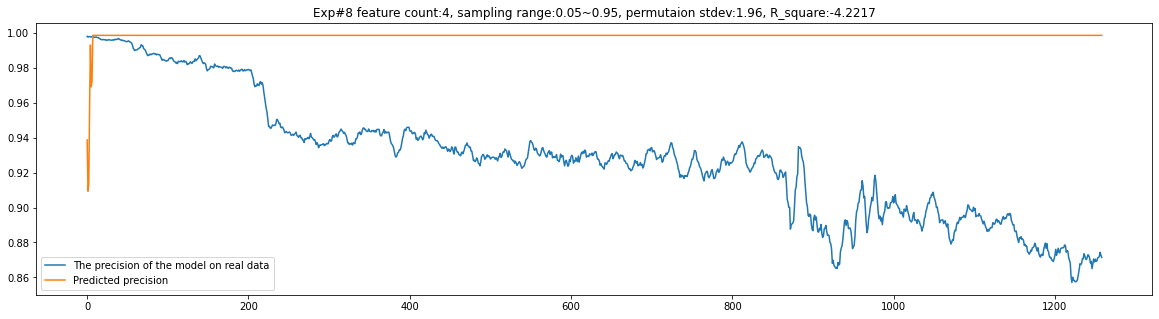

In [316]:
top = 4
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
print("length:",length)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mpp1.build_second_performance_model()
df2 = mpp1.predict_precision_for_second_model(Y2,X2,window_size = 10000,step = 5000)
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))


In [317]:
top = 4
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))


['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 1.96
1000/1000 acc:0.9031 0.5478 0.6820 sum:-0.4978(647, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              1185.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   5.37e-295
Time:                        16:25:15   Log-Likelihood:                         -204.71
No. Observations:                 647   AIC:                                      417.4
Df Residuals:                     643   BIC:                                      435.3
Df Model:                           4                                                  
Covariance Type:            n

KeyboardInterrupt: ignored

# 여기서 부터는 다른 데이터셋, 모델로 검증


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [143]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [144]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 94% 247M/263M [00:01<00:00, 139MB/s]
100% 263M/263M [00:01<00:00, 147MB/s]


In [145]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [181]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [182]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

## 1/30 로 축소 한다.

In [183]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [184]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [185]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


## 기타 등등 전처리

In [186]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827503
False     14158
Name: Errors?, dtype: int64

In [187]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [188]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [189]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [190]:
df = df.sort_values(['Year','Month','Day'])

In [191]:
df.Year.value_counts()

2015    60362
2016    60011
2018    59787
2019    59659
2017    57855
2014    57043
2013    56788
2012    54927
2010    53279
2011    52889
2009    46120
2008    44408
2007    37080
2006    31260
2005    25036
2004    20319
2003    15851
2002    11824
2020    11226
2001     8947
2000     6058
1999     4013
1998     2605
1997     1631
1996     1013
1995      689
1994      500
1993      257
1992      166
1991       58
Name: Year, dtype: int64

In [192]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37080 entries, 24065279 to 22622928
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37080 non-null  int64  
 1   Amount      37080 non-null  float64
 2   Use Chip    37080 non-null  int64  
 3   MCC         37080 non-null  int64  
 4   is online   37080 non-null  int64  
 5   Hour        37080 non-null  int64  
 6   is vozmes   37080 non-null  int64  
 7   abs_amount  37080 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.5 MB


## fraud detect model 만들기

이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [194]:
X.shape

(37080, 8)

In [195]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [196]:
x_ref.shape[0] + x_inf.shape[0]

37080

In [162]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [197]:
#cat boost classifier

from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041382
0:	learn: 0.6226053	total: 5.42ms	remaining: 5.42s
1:	learn: 0.5559098	total: 10.8ms	remaining: 5.41s
2:	learn: 0.4996921	total: 16ms	remaining: 5.31s
3:	learn: 0.4577165	total: 21.2ms	remaining: 5.28s
4:	learn: 0.4161724	total: 25.9ms	remaining: 5.16s
5:	learn: 0.3772907	total: 31.2ms	remaining: 5.17s
6:	learn: 0.3445970	total: 36.3ms	remaining: 5.15s
7:	learn: 0.3153582	total: 41.6ms	remaining: 5.16s
8:	learn: 0.2906841	total: 46.7ms	remaining: 5.14s
9:	learn: 0.2697091	total: 51.9ms	remaining: 5.14s
10:	learn: 0.2514714	total: 57.2ms	remaining: 5.15s
11:	learn: 0.2336803	total: 62.5ms	remaining: 5.14s
12:	learn: 0.2230948	total: 68.5ms	remaining: 5.2s
13:	learn: 0.2104357	total: 73.7ms	remaining: 5.19s
14:	learn: 0.2020273	total: 79ms	remaining: 5.19s
15:	learn: 0.1913949	total: 84.3ms	remaining: 5.19s
16:	learn: 0.1820048	total: 89.8ms	remaining: 5.19s
17:	learn: 0.1740542	total: 95.1ms	remaining: 5.19s
18:	learn: 0.1671613	total: 101ms	remaining: 5.21

In [198]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.7047353760445683
0.7804379056945793


## 향후 데이터에 대한 precision...

In [199]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [200]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10227
           1       0.94      0.56      0.70       897

    accuracy                           0.96     11124
   macro avg       0.95      0.78      0.84     11124
weighted avg       0.96      0.96      0.96     11124



In [201]:
base_score

(0.9387755102040817, 0.5641025641025641, 0.7047353760445683, None)

## importance 추출

In [202]:
COLUMNS = X.columns

In [203]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [204]:
importances = cat.feature_importances_

## mpp2 생성 for credit card fraud detect model

In [229]:
mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)
erdic= {}

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.5
999/1000 acc:0.2443 0.3333 0.2819 sum:0.1936(700, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              2129.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   8.23e-298
Time:                        14:31:24   Log-Likelihood:                          134.65
No. Observations:                 700   AIC:                                     -265.3
Df Residuals:                     698   BIC:                                     -256.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
        

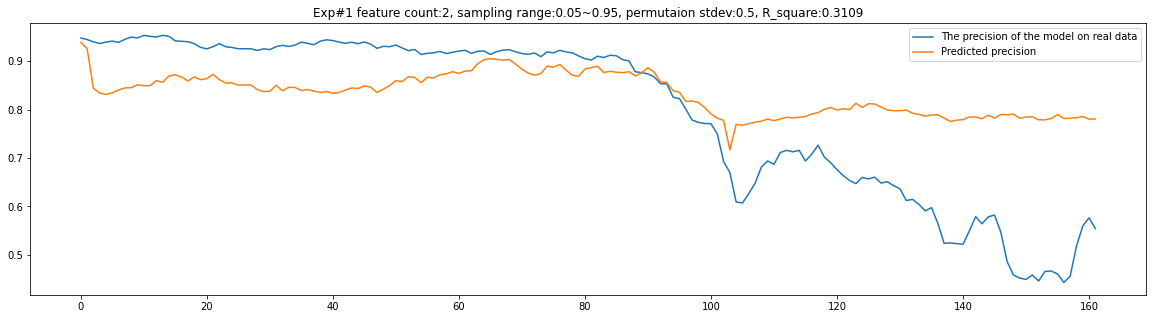

In [234]:
Exp = 1
top = 2
samplingsigma=0.95
permutaionsigma=0.5

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour', 'abs_amount']
sampling_sigma: 0.95
permutaion_sigma: 0.5
1000/1000 acc:0.2688 0.3757 0.3134 sum:-0.1384(806, 3)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              2003.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:36:02   Log-Likelihood:                          159.81
No. Observations:                 806   AIC:                                     -313.6
Df Residuals:                     803   BIC:                                     -299.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                           

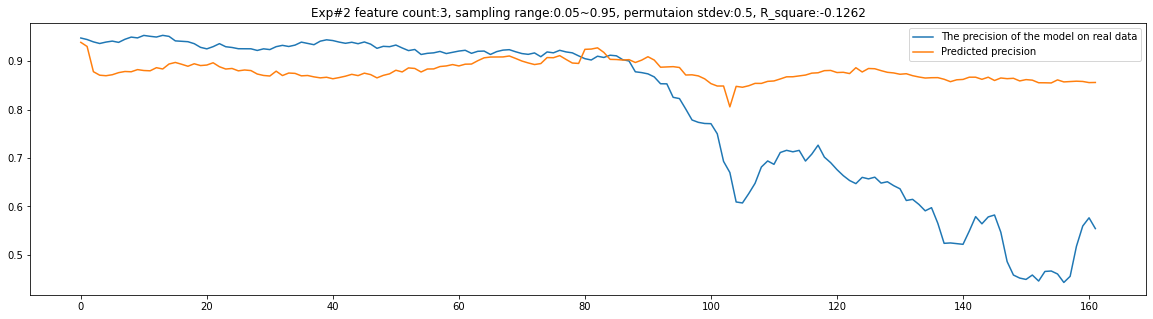

In [235]:
Exp = 2
top = 3
samplingsigma=0.95
permutaionsigma=0.5

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour', 'abs_amount', 'Amount']
sampling_sigma: 0.95
permutaion_sigma: 0.5
1000/1000 acc:0.1984 0.3731 0.2591 sum:-0.1938(787, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              2321.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:40:51   Log-Likelihood:                          182.46
No. Observations:                 787   AIC:                                     -356.9
Df Residuals:                     783   BIC:                                     -338.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                 

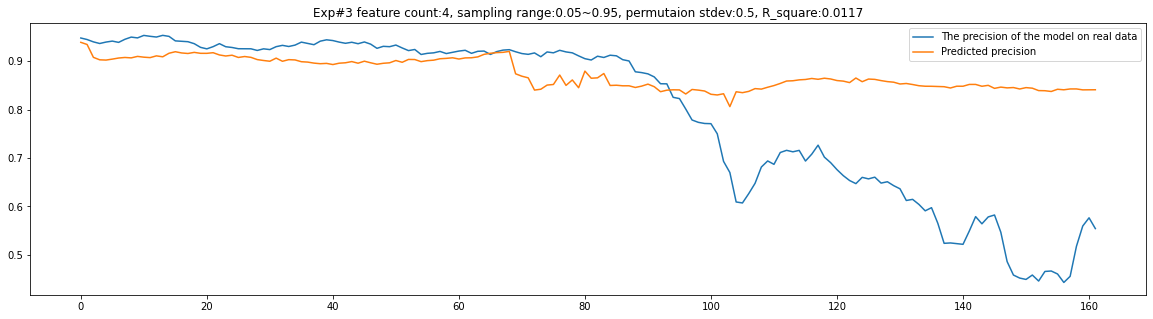

In [236]:
Exp = 3
top = 4
samplingsigma=0.95
permutaionsigma=0.5

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.6
1000/1000 acc:0.9313 0.4311 0.5894 sum:-0.0887(749, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              2481.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:45:54   Log-Likelihood:                          104.74
No. Observations:                 749   AIC:                                     -205.5
Df Residuals:                     747   BIC:                                     -196.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      

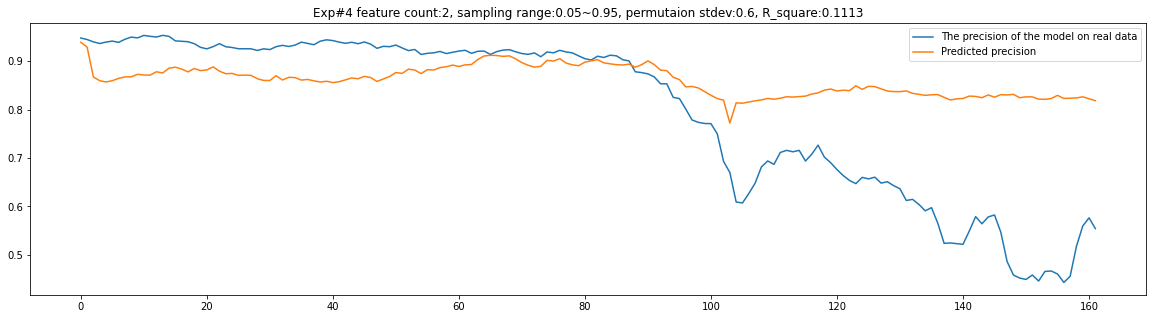

In [237]:
Exp = 4
top = 2
samplingsigma=0.95
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.7
1000/1000 acc:0.9105 0.4084 0.5639 sum:-0.0977(844, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              7396.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:50:04   Log-Likelihood:                          485.63
No. Observations:                 844   AIC:                                     -967.3
Df Residuals:                     842   BIC:                                     -957.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      

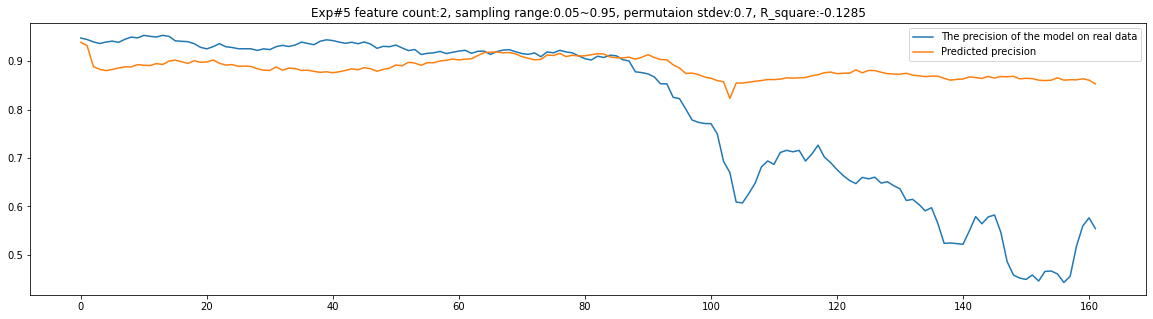

In [238]:
Exp = 5
top = 2
samplingsigma=0.95
permutaionsigma=0.7

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.8
permutaion_sigma: 0.6
1000/1000 acc:0.1969 0.3499 0.2520 sum:-0.1774(785, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              2754.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:54:05   Log-Likelihood:                          164.74
No. Observations:                 785   AIC:                                     -325.5
Df Residuals:                     783   BIC:                                     -316.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
       

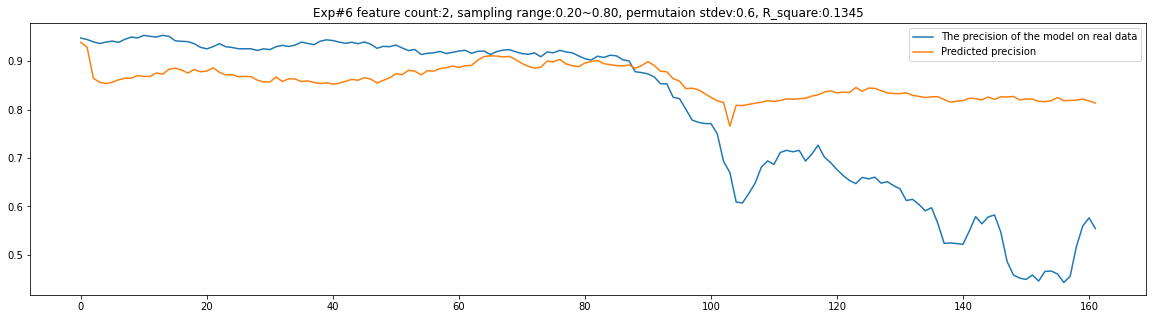

In [239]:
Exp = 6
top = 2
samplingsigma=0.80
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.6
permutaion_sigma: 0.6
1000/1000 acc:0.2468 0.4045 0.3066 sum:-0.1802(809, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              3979.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:57:57   Log-Likelihood:                          240.91
No. Observations:                 809   AIC:                                     -477.8
Df Residuals:                     807   BIC:                                     -468.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
       

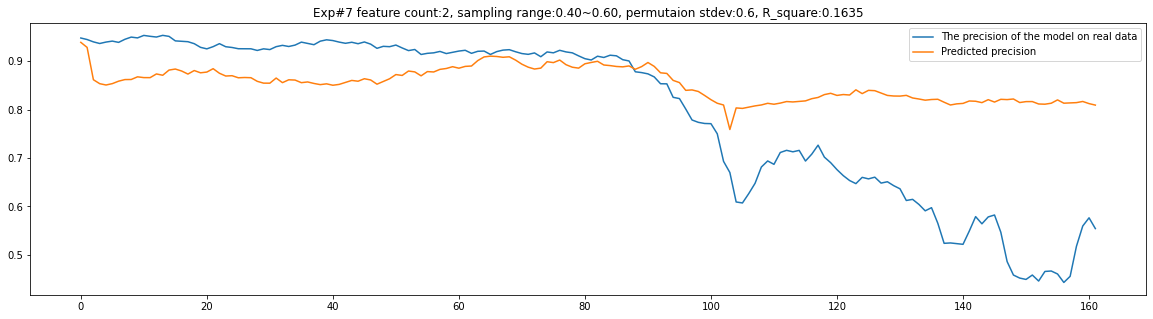

In [240]:
Exp = 7
top = 2
samplingsigma=0.60
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = length,step = int(length/10))
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

In [274]:
mpp3 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

['MCC', 'Hour']
sampling_sigma: 0.6
permutaion_sigma: 0.6
1000/1000 acc:0.1643 0.3492 0.2235 sum:-0.1824length: 25956
(791, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              3954.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:03:02   Log-Likelihood:                          224.45
No. Observations:                 791   AIC:                                     -444.9
Df Residuals:                     789   BIC:                                     -435.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                            

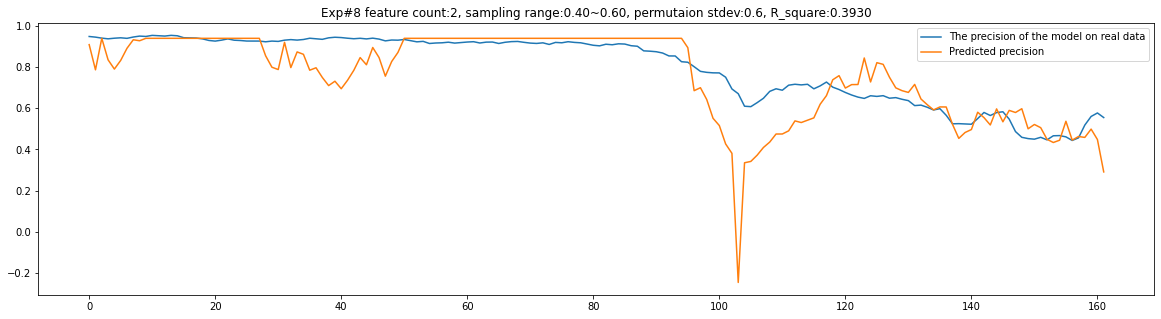

In [275]:
Exp = 8
top = 2
samplingsigma=0.60
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp3.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
print("length:",length)
mpp3.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mpp3.build_second_performance_model()
df2 = mpp3.predict_precision_for_second_model(y_test2.values,X_test2.values,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp3.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
